# Test De-Noising Model Implementation (to be deleted)

Since no DL image can be created now (noise need to be further analyzed), we try the denoising model with the real CT images.

In [1]:
import torch

torch.cuda.is_available()

True

In [2]:
torch.cuda.get_device_name(0)

'Tesla V100-SXM2-32GB'

## Model

In [3]:
import os
import torch
from utils import load_data

os.chdir("models")
from cnn_trainer import CnnTrainer
from cnn_viewer import CnnViewer

os.chdir("../")

%load_ext autoreload
%autoreload 2

## Data

Create a folder to be deleted to have png images to  test our model. Already created.

Define model parameters

Start Training Epoch 1/10...


Progress of training epoch 1: 85it [00:07, 10.70it/s]                        
Progress of validation metrics epoch 1: 100%|██████████| 21/21 [00:00<00:00, 51.48it/s]


- Average metrics: 
	- train loss=1.02e+00, train mse=1.02e+00, learning rate=0.000991572953781831 
	- val loss=9.99e-01, val mse=9.99e-01 
Finish Training Epoch 1 !

Start Training Epoch 2/10...


Progress of training epoch 2: 85it [00:05, 15.04it/s]                        
Progress of validation metrics epoch 2: 100%|██████████| 21/21 [00:00<00:00, 54.88it/s]


- Average metrics: 
	- train loss=1.00e+00, train mse=1.00e+00, learning rate=0.0009425967018235987 
	- val loss=9.99e-01, val mse=9.99e-01 
Finish Training Epoch 2 !

Start Training Epoch 3/10...


Progress of training epoch 3: 85it [00:05, 14.99it/s]                        
Progress of validation metrics epoch 3: 100%|██████████| 21/21 [00:00<00:00, 52.57it/s]


- Average metrics: 
	- train loss=9.99e-01, train mse=9.99e-01, learning rate=0.0008497860551366832 
	- val loss=9.97e-01, val mse=9.97e-01 
Finish Training Epoch 3 !

Start Training Epoch 4/10...


Progress of training epoch 4: 85it [00:05, 15.07it/s]                        
Progress of validation metrics epoch 4: 100%|██████████| 21/21 [00:00<00:00, 49.93it/s]


- Average metrics: 
	- train loss=9.97e-01, train mse=9.97e-01, learning rate=0.0007223328999351857 
	- val loss=9.96e-01, val mse=9.96e-01 
Finish Training Epoch 4 !

Start Training Epoch 5/10...


Progress of training epoch 5: 85it [00:05, 15.14it/s]                        
Progress of validation metrics epoch 5: 100%|██████████| 21/21 [00:00<00:00, 54.07it/s]


- Average metrics: 
	- train loss=9.96e-01, train mse=9.96e-01, learning rate=0.0005728600865284274 
	- val loss=9.96e-01, val mse=9.96e-01 
Finish Training Epoch 5 !

Start Training Epoch 6/10...


Progress of training epoch 6: 85it [00:05, 15.17it/s]                        
Progress of validation metrics epoch 6: 100%|██████████| 21/21 [00:00<00:00, 50.42it/s]


- Average metrics: 
	- train loss=9.95e-01, train mse=9.95e-01, learning rate=0.00041617127313862794 
	- val loss=9.96e-01, val mse=9.96e-01 
Finish Training Epoch 6 !

Start Training Epoch 7/10...


Progress of training epoch 7: 85it [00:05, 15.14it/s]                        
Progress of validation metrics epoch 7: 100%|██████████| 21/21 [00:00<00:00, 52.75it/s]


- Average metrics: 
	- train loss=9.94e-01, train mse=9.94e-01, learning rate=0.0002677847843881767 
	- val loss=9.95e-01, val mse=9.95e-01 
Finish Training Epoch 7 !

Start Training Epoch 8/10...


Progress of training epoch 8: 85it [00:05, 15.07it/s]                        
Progress of validation metrics epoch 8: 100%|██████████| 21/21 [00:00<00:00, 54.32it/s]


- Average metrics: 
	- train loss=9.94e-01, train mse=9.94e-01, learning rate=0.00014239668984444875 
	- val loss=9.94e-01, val mse=9.94e-01 
Finish Training Epoch 8 !

Start Training Epoch 9/10...


Progress of training epoch 9: 85it [00:05, 15.15it/s]                        
Progress of validation metrics epoch 9: 100%|██████████| 21/21 [00:00<00:00, 55.32it/s]


- Average metrics: 
	- train loss=9.93e-01, train mse=9.93e-01, learning rate=5.242531799444179e-05 
	- val loss=9.93e-01, val mse=9.93e-01 
Finish Training Epoch 9 !

Start Training Epoch 10/10...


Progress of training epoch 10: 85it [00:05, 15.14it/s]                        
Progress of validation metrics epoch 10: 100%|██████████| 21/21 [00:00<00:00, 53.50it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


- Average metrics: 
	- train loss=9.93e-01, train mse=9.93e-01, learning rate=6.7813557269298445e-06 
	- val loss=9.95e-01, val mse=9.95e-01 
Finish Training Epoch 10 !



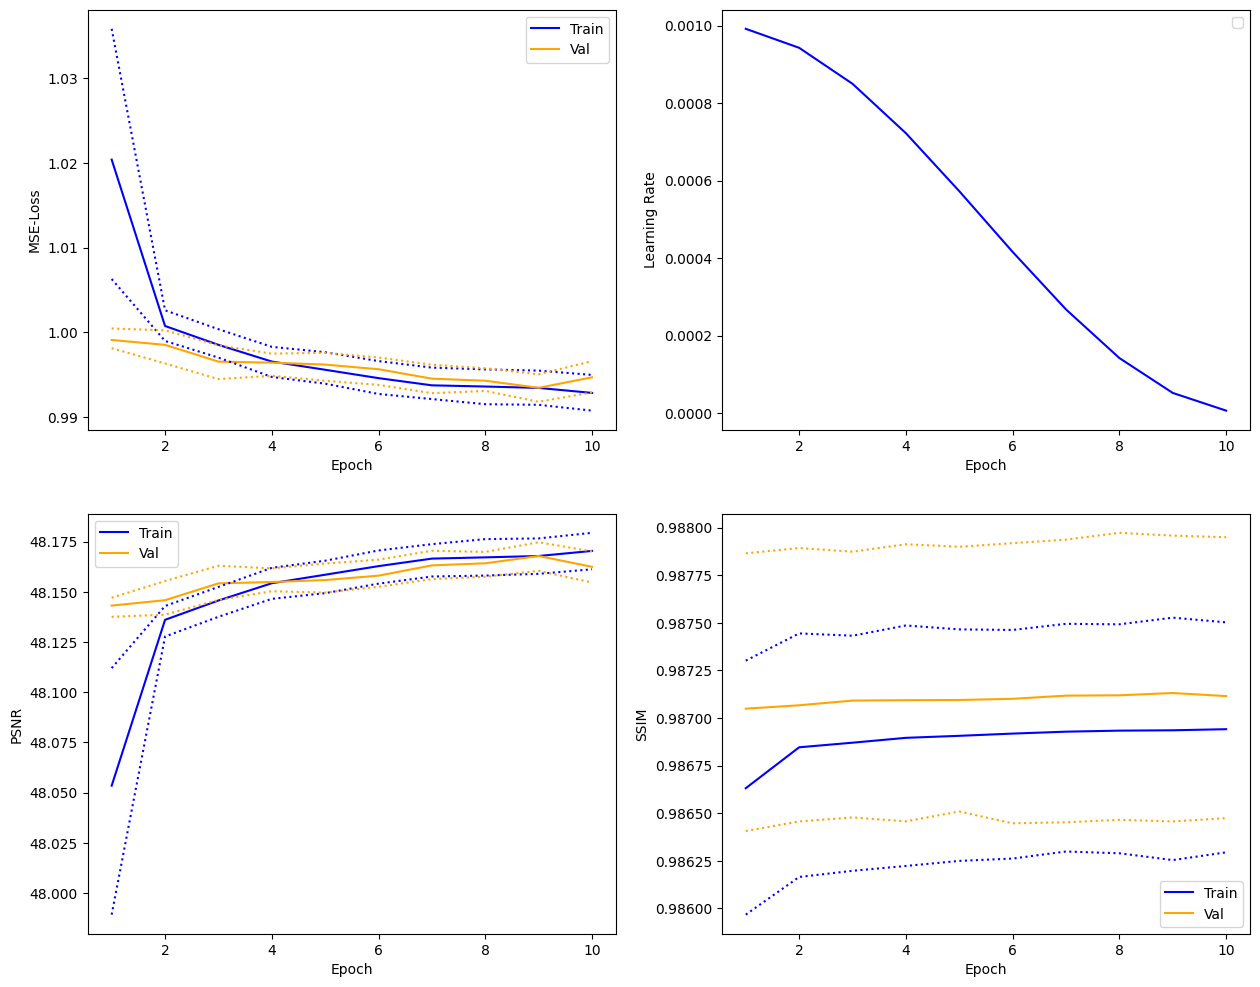

In [4]:
def gaussian(image: torch.tensor) -> torch.tensor:
    std_dev = 1
    noise = torch.randn(image.size()) * std_dev
    return image.clone() + noise

data_kwargs = dict(
    batch_size=2,
    images_folder_path='to_delete/train',
    add_noise=lambda x: gaussian(x)
)

optimizer_kwargs = dict(
    lr=1e-3,
    weight_decay=1e-2
)

cnn = CnnTrainer(
    model_name='DnCNN',
    data_kwargs=data_kwargs,
    num_epochs=10,
    device='cuda',
    optimizer_kwargs=optimizer_kwargs,
    model_saving_path=None,
    val_size=0.2
)

cnn.fit(plot=True)

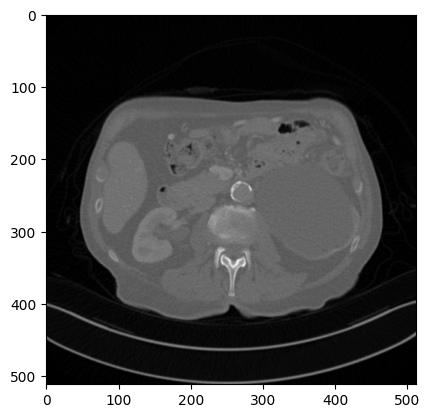

In [9]:
import matplotlib.pyplot as plt

loader = cnn.training_loader
# Alternatively, use iter() and next() to get the next batch
data_iter = iter(loader)
batch = next(data_iter)

data, target = batch[1][0], batch[0][0]

plt.imshow((data-target).cpu().numpy().squeeze(), cmap='grey')
plt.show()